## GRIP : The Spark Foundation

## Task 3: Exploratory Data Analysis Retail

## By : Abhishek Pathak

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data into a data frame

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Getting Insights of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking for Null Values

In [5]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Checking Correlation between each parameter

In [6]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


Text(0.5, 1, 'Correaltion between each parameter')

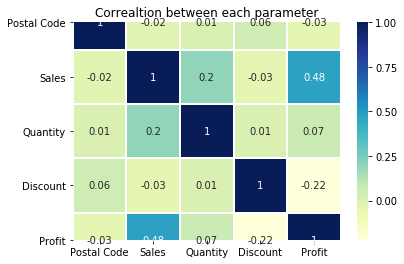

In [7]:
sns.heatmap(np.round(df.corr(),2), cmap ="YlGnBu", linecolor='white', linewidths=1, annot = True )
plt.title('Correlation between each parameter')

## Data Visualisation

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


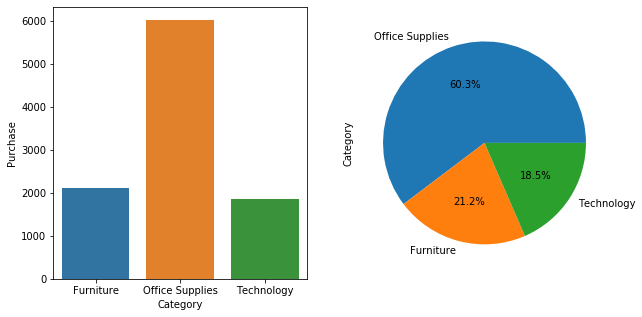

In [8]:
#Let's see which category dominates the market

print(df['Category'].value_counts())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(df['Category'])
plt.ylabel("Purchase")
plt.subplot(1,2,2)
df['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<BarContainer object of 9994 artists>

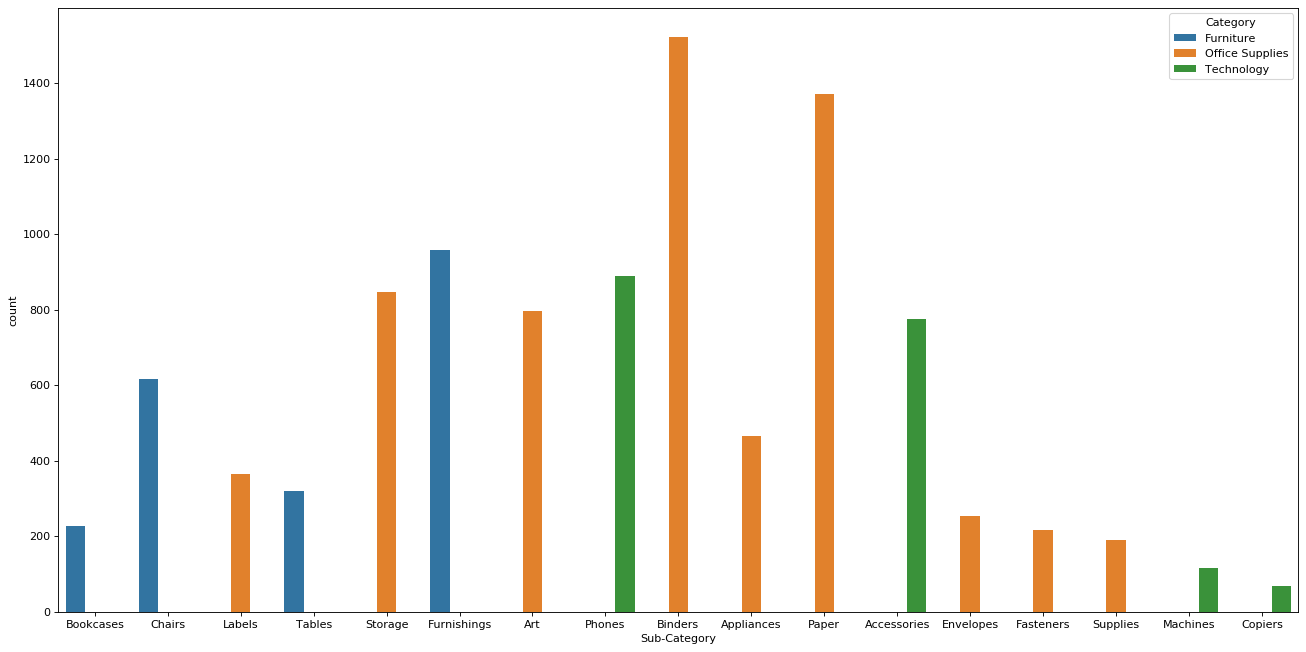

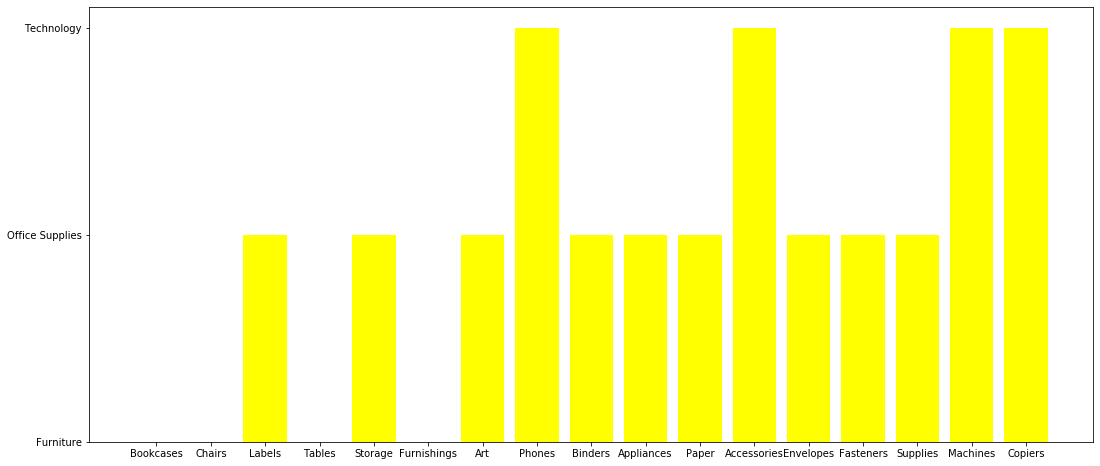

In [9]:
#Let's see which category dominates the market

df['Sub-Category'].value_counts()
plt.figure(figsize=(20,10), dpi = 80, facecolor='w', edgecolor='k')
sns.countplot(df['Sub-Category'], hue= df['Category'])
plt.figure(figsize=(18,8))
plt.bar('Sub-Category','Category', data = df, color = "yellow")

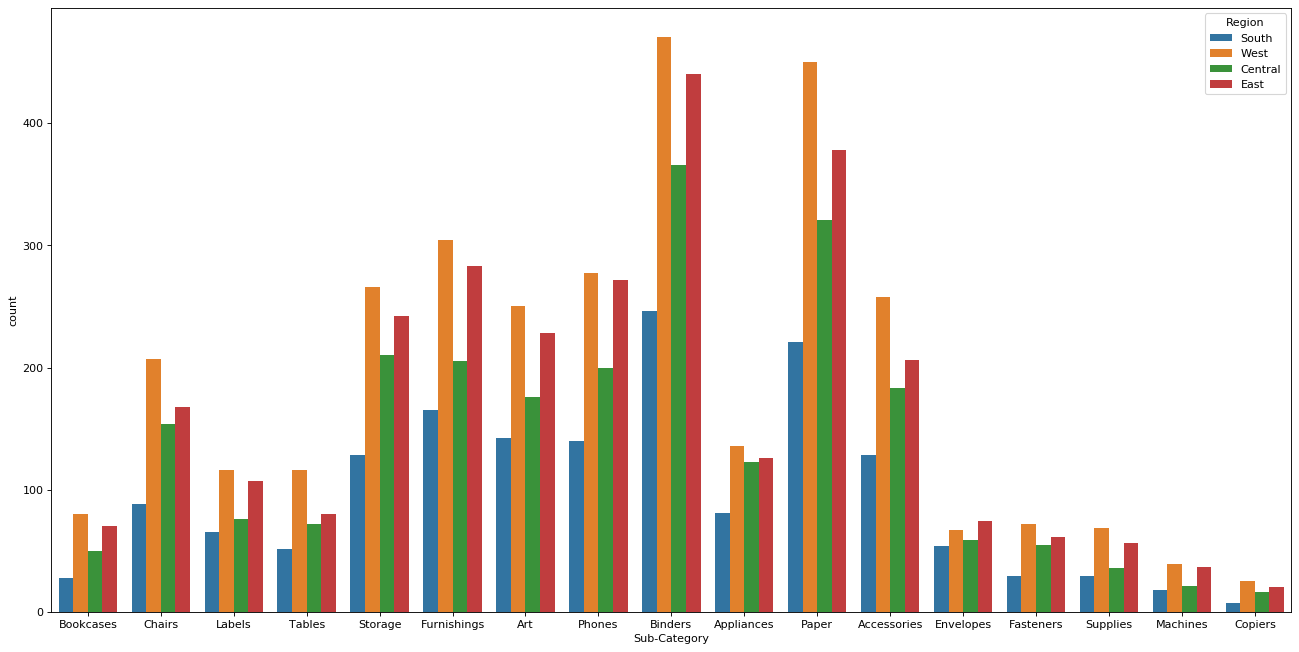

In [10]:
plt.figure(figsize=(20,10), dpi = 80, facecolor='w', edgecolor='k')
sns.countplot(df['Sub-Category'], hue= df['Region'])

Text(0.5, 1.0, 'State vs Profit')

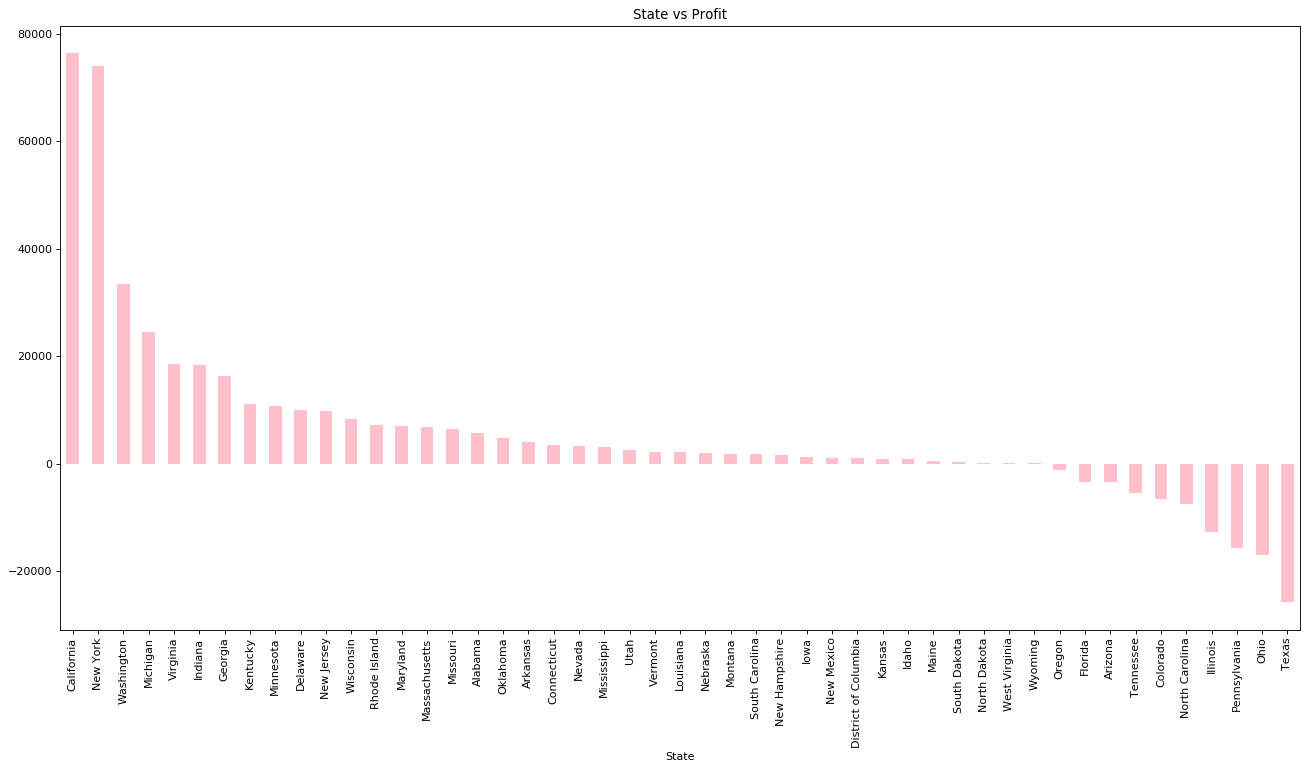

In [12]:
plt.figure(figsize=(20,10), dpi = 80, facecolor='w', edgecolor='k')
df.groupby(['State'])['Profit'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'pink')
plt.title('State vs Profit')

<Figure size 1200x800 with 0 Axes>

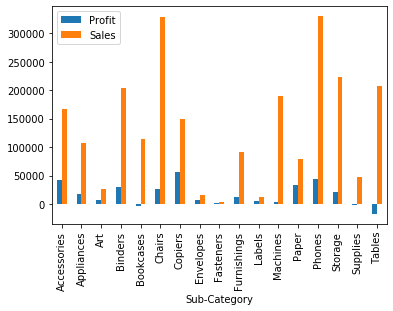

In [13]:
plt.figure(figsize=(15,10), dpi = 80, facecolor='w', edgecolor='k')
df.groupby(['Sub-Category'])['Profit','Sales'].agg(sum).plot(kind = 'bar')

In [15]:
Sales_per_State = df.groupby('State')
Sales_per_State.get_group('California')
Sales_per_State.describe()

Postal Code                                               \
                           count          mean          std      min      25%   
State                                                                           
Alabama                     61.0  35994.573770   490.770261  35244.0  35601.0   
Arizona                    224.0  85277.348214   244.753750  85023.0  85023.0   
Arkansas                    60.0  72321.816667   292.072344  71603.0  72209.0   
California                2001.0  92145.246877  1916.626492  90004.0  90045.0   
Colorado                   182.0  80295.758242   333.282713  80004.0  80027.0   
Connecticut                 82.0   6475.670732   291.845218   6010.0   6360.0   
Delaware                    96.0  19755.250000    62.869790  19711.0  19711.0   
District of Columbia        10.0  20016.000000     0.000000  20016.0  20016.0   
Florida                    383.0  33003.198433   565.282793  32114.0  32303.0   
Georgia                    184.0  30899.347826   804.960107  30062.0  30318.0   
Idaho                       21.0  83462.333333   218.564712  83201.0  83201.0   
Illinois                   492.0  60719.048780   535.214484  60004.0  60610.0   
Indiana                    149.0  46923.503356   576.009615  46060.0  46226.0   
Iowa                        30.0  51256.900000  1008.400213  50315.0  50315.0   
Kansas                      24.0  66824.916667   708.040033  66062.0  66212.0   
Kentucky                   139.0  41189.467626   982.994031  40214.0  40324.0   
Louisiana                   42.0  70777.357143   361.205220  70065.0  70506.0   
Maine                        8.0   4340.625000    83.325416   4240.0   4240.0   
Maryland                   105.0  21016.571429   217.037964  20707.0  20735.0   
Massachusetts              135.0   1987.370370   245.126581   1040.0   1841.0   
Michigan                   255.0  48455.305882   425.657926  48066.0  48205.0   
Minnesota                   89.0  55418.247191   387.762705  55016.0  55113.0   
Mississippi                 53.0  39189.113208   223.457848  38671.0  39212.0   
Missouri                    66.0  65126.696970  1015.949483  63116.0  65132.5   
Montana                     15.0  59491.733333   177.931153  59102.0  59405.0   
Nebraska                    38.0  68121.421053   154.273648  68025.0  68104.0   
Nevada                      39.0  89136.846154   164.070514  89015.0  89031.0   
New Hampshire               27.0   3475.370370   276.574951   3060.0   3301.0   
New Jersey                 130.0   7753.338462   707.858081   7002.0   7060.0   
New Mexico                  37.0  87609.621622   506.341307  87105.0  87105.0   
New York                  1128.0  10492.660461  1149.906388  10009.0  10011.0   
North Carolina             249.0  28089.895582   417.725819  27217.0  27707.0   
North Dakota                 7.0  58103.000000     0.000000  58103.0  58103.0   
Ohio                       469.0  43880.247335   813.999658  43017.0  43229.0   
Oklahoma                    66.0  73683.636364   509.725285  73034.0  73120.0   
Oregon                     124.0  97355.846774   167.428667  97030.0  97206.0   
Pennsylvania               587.0  19063.994889   328.993872  16602.0  19120.0   
Rhode Island                56.0   2908.535714     9.893918   2886.0   2908.0   
South Carolina              42.0  29287.333333   141.350915  29203.0  29203.0   
South Dakota                12.0  57227.500000   237.028767  57103.0  57103.0   
Tennessee                  183.0  37653.409836   482.587077  37042.0  37211.0   
Texas                      985.0  76901.211168  1251.940629  75002.0  76017.0   
Utah                        53.0  84195.622642   212.918929  84020.0  84057.0   
Vermont                     11.0   5408.000000     0.000000   5408.0   5408.0   
Virginia                   224.0  22876.495536   655.454301  22153.0  22204.0   
Washington                 506.0  98145.626482   198.148131  98002.0  98103.0   
West Virginia                4.0  26003.000000     0

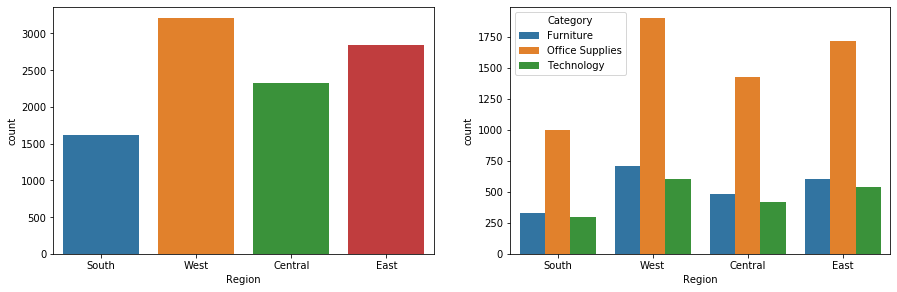

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df['Region'])
plt.subplot(2,2,2)
sns.countplot(df['Region'], hue= df['Category'])